In [1]:
%load_ext autoreload
%autoreload 2

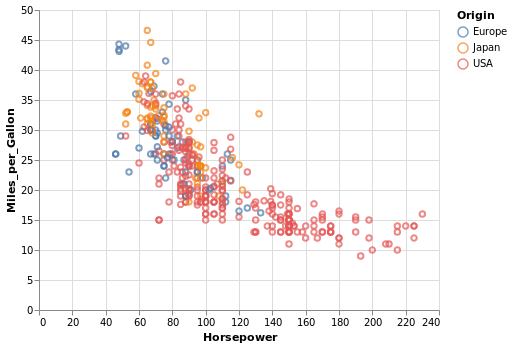

In [1]:
import altair as alt
alt.renderers.enable('default')

# load a simple dataset as a pandas DataFrame
from vega_datasets import data
cars = data.cars()

chart = alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()

chart.display()

In [2]:
from sbmlsim.tests.settings import MODEL_REPRESSILATOR
from sbmlsim.model import load_model
from sbmlsim.parametrization import ChangeSet
from sbmlsim.simulation import TimecourseSimulation, Timecourse, timecourses
r = load_model(MODEL_REPRESSILATOR)

# parameter sensitivity
changeset = ChangeSet.parameter_sensitivity_changeset(r, sensitivity=0.05)
tc_sims = TimecourseSimulation([
        Timecourse(start=0, end=100, steps=100),
        Timecourse(start=0, end=200, steps=100, model_changes={"boundary_condition": {"X": True}}),
        Timecourse(start=0, end=100, steps=100, model_changes={"boundary_condition": {"X": False}}),
    ]).ensemble(changeset=changeset)

result = timecourses(r, tc_sims)

In [4]:
result.mean

,time,PX,PY,PZ,X,Y,Z,eff,n,KM,...,Reaction10,Reaction11,Reaction12,cell,[PX],[PY],[PZ],[X],[Y],[Z]
0,0.0,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,20.0,2.0,40.0,...,30.000000,30.000000,30.000000,1.0,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
1,1.0,81.449451,188.404858,42.633599,19.900098,30.610833,7.492315,20.0,2.0,40.0,...,14.058060,5.860013,1.326493,1.0,81.449451,188.404858,42.633599,19.900098,30.610833,7.492315
2,2.0,218.539999,358.027529,84.579060,21.231407,23.608359,5.869196,20.0,2.0,40.0,...,5.509079,1.004502,0.401029,1.0,218.539999,358.027529,84.579060,21.231407,23.608359,5.869196
3,3.0,337.611267,469.602282,113.047472,18.543738,17.236492,4.407021,20.0,2.0,40.0,...,3.366378,0.446553,0.246893,1.0,337.611267,469.602282,113.047472,18.543738,17.236492,4.407021
4,4.0,428.916686,536.618680,131.033006,15.560918,12.484975,3.299300,20.0,2.0,40.0,...,2.586620,0.289576,0.196419,1.0,428.916686,536.618680,131.033006,15.560918,12.484975,3.299300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,396.0,1564.268693,693.048812,49.636454,30.997320,0.230929,0.356290,20.0,2.0,40.0,...,11.969097,0.052901,0.158684,1.0,1564.268693,693.048812,49.636454,30.997320,0.230929,0.356290
299,397.0,1671.306577,647.912657,48.825408,32.164758,0.206455,0.394068,20.0,2.0,40.0,...,12.238770,0.049727,0.176740,1.0,1671.306577,647.912657,48.825408,32.164758,0.206455,0.394068
300,398.0,1778.487011,605.665111,48.340854,33.184606,0.186758,0.437162,20.0,2.0,40.0,...,12.433488,0.047150,0.197316,1.0,1778.487011,605.665111,48.340854,33.184606,0.186758,0.437162
301,399.0,1884.727650,566.140511,48.199035,34.033278,0.170886,0.486296,20.0,2.0,40.0,...,12.545865,0.045054,0.220750,1.0,1884.727650,566.140511,48.199035,34.033278,0.170886,0.486296


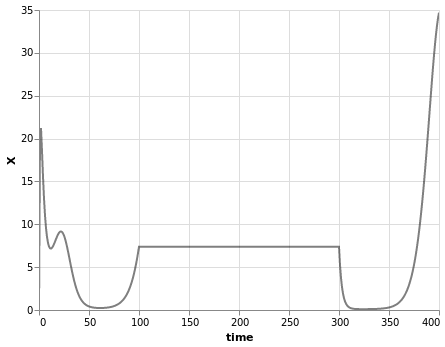

In [14]:
line = alt.Chart(result.mean).mark_line().encode(
    x='time',
    y='X',
    opacity=alt.value(0.5),
    color=alt.value('black')
).interactive()



line.display()